<a href="https://colab.research.google.com/github/Yunus-Korkmaz-1335/Yapay-zeka-ve-makine-renmesi-/blob/main/turkiye_ilce_nufusu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df=pd.read_csv('/content/turkiye_ilce_nufusu.csv')
df

,İl ve ilçe,Nüfus,İl ve ilçe merkezleri,Belde ve köyler,Yıllık nüfus artış hızı
0,Adana,2 263 373,2 263 373,-,2.1
1,Aladağ,15 855,15 855,-,-9.0
2,Ceyhan,159 955,159 955,-,-7.5
3,Çukurova,389 319,389 319,-,6.9
4,Feke,16 072,16 072,-,-28.5
...,...,...,...,...,...
1049,Çilimli,19 848,10 095,9 753,-2.7
1050,Gölyaka,20 506,10 376,10 130,4.8
1051,Gümüşova,16 347,8 785,7 562,5.7
1052,Kaynaşlı,20 540,10 099,10 441,-0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   İl ve ilçe               1054 non-null   object 
 1   Nüfus                    1054 non-null   object 
 2   İl ve ilçe merkezleri    1054 non-null   object 
 3   Belde ve köyler          1053 non-null   object 
 4   Yıllık nüfus artış hızı  1054 non-null   float64
dtypes: float64(1), object(4)
memory usage: 41.3+ KB


In [ ]:
# DataFrame'deki her bir sütunda bulunan eksik değerlerin sayısını hesaplar ve bu sayıları gösterir
df.isna().sum()

,0
İl ve ilçe,0
Nüfus,0
İl ve ilçe merkezleri,0
Belde ve köyler,0
Yıllık nüfus artış hızı,0
Hız Sınıfı,0


In [ ]:
df.describe()
#
# count: Sütundaki eksik olmayan değerlerin sayısı.
# mean: Sütundaki değerlerin ortalaması.
# std: Standart sapma, verilerin ortalama etrafındaki dağılımını ölçer.
# min: Sütundaki en küçük değer.
# 25%: 25. yüzdelik dilim (birinci çeyrek).
#   50%: 50. yüzdelik dilim (medyan).
# 75%: 75. yüzdelik dilim (üçüncü çeyrek).
 #  max: Sütundaki en büyük değer.

,Yıllık nüfus artış hızı
count,1054.000000
mean,-1.431214
std,30.158624
min,-210.700000
25%,-17.700000
50%,-2.400000
75%,12.600000
max,301.900000


In [ ]:
# Sayısal olmayan sütunlardan gereksiz boşlukları temizlemek için bu satır yazıldı
df.columns = df.columns.str.strip()

In [ ]:
# Sayısal olmayan sütunları sayısala çevirme
# 'Belde ve köyler' sütununda '-' yerine '0', boşluklar yerine '' koyarak ve ardından float'a çevirerek düzeltin.
df['Belde ve köyler'] = df['Belde ve köyler'].astype(str).str.replace('-', '0').str.replace(' ', '').astype(float)
df["Nüfus"] = df["Nüfus"].astype(str).str.replace(".", "", regex=False).str.replace(" ", "", regex=False).astype(int) # Boşlukları dönüştürmeden önce kaldırmak için bu satırı değiştirdik
df["İl ve ilçe merkezleri"] = df["İl ve ilçe merkezleri"].astype(str).str.replace(".", "", regex=False).str.replace(" ", "", regex=False).astype(int) # Boşlukları dönüştürmeden önce kaldırmak için bu satırı değiştirdik
df

,İl ve ilçe,Nüfus,İl ve ilçe merkezleri,Belde ve köyler,Yıllık nüfus artış hızı,Hız Sınıfı
0,Adana,2263373,2263373,0.0,2.1,1
1,Aladağ,15855,15855,0.0,-9.0,0
2,Ceyhan,159955,159955,0.0,-7.5,0
3,Çukurova,389319,389319,0.0,6.9,1
4,Feke,16072,16072,0.0,-28.5,0
...,...,...,...,...,...,...
1049,Çilimli,19848,10095,9753.0,-2.7,0
1050,Gölyaka,20506,10376,10130.0,4.8,1
1051,Gümüşova,16347,8785,7562.0,5.7,1
1052,Kaynaşlı,20540,10099,10441.0,-0.2,0


In [ ]:
# Eksik değerleri doldurma
df['Belde ve köyler'].fillna(0, inplace=True)
df

<ipython-input-37-ed291a7671f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Belde ve köyler'].fillna(0, inplace=True)


,İl ve ilçe,Nüfus,İl ve ilçe merkezleri,Belde ve köyler,Yıllık nüfus artış hızı,Hız Sınıfı
0,Adana,2263373,2263373,0.0,2.1,1
1,Aladağ,15855,15855,0.0,-9.0,0
2,Ceyhan,159955,159955,0.0,-7.5,0
3,Çukurova,389319,389319,0.0,6.9,1
4,Feke,16072,16072,0.0,-28.5,0
...,...,...,...,...,...,...
1049,Çilimli,19848,10095,9753.0,-2.7,0
1050,Gölyaka,20506,10376,10130.0,4.8,1
1051,Gümüşova,16347,8785,7562.0,5.7,1
1052,Kaynaşlı,20540,10099,10441.0,-0.2,0


In [ ]:

# Hedef değişken oluşturma (Yıllık nüfus artış hızı > 0: Hızlı(1), aksi halde Yavaş(0))
# hızlı 1 olarak tanımladım yavaşı 0 olarak tanımladım

df['Hız Sınıfı'] = np.where(df['Yıllık nüfus artış hızı'] > 0, 1, 0)
df

,İl ve ilçe,Nüfus,İl ve ilçe merkezleri,Belde ve köyler,Yıllık nüfus artış hızı,Hız Sınıfı
0,Adana,2263373,2263373,0.0,2.1,1
1,Aladağ,15855,15855,0.0,-9.0,0
2,Ceyhan,159955,159955,0.0,-7.5,0
3,Çukurova,389319,389319,0.0,6.9,1
4,Feke,16072,16072,0.0,-28.5,0
...,...,...,...,...,...,...
1049,Çilimli,19848,10095,9753.0,-2.7,0
1050,Gölyaka,20506,10376,10130.0,4.8,1
1051,Gümüşova,16347,8785,7562.0,5.7,1
1052,Kaynaşlı,20540,10099,10441.0,-0.2,0


KNN

In [ ]:
# olusturdugumuz hız sınıfındaki hızlı ve yavası görüntüleme
df['Hız Sınıfı'].value_counts()

,count
Hız Sınıfı,
0,569
1,485


In [ ]:
# Özellik ve hedef değişkenlerin ayrılması
# X modelin girdisi, y ise modelin çıktısıdır.
# y modelin tahmin etmeye çalıştığı şeydir.
# x modelin bir tahmin yapmak için kullandığı verilerdi
X = df[['Nüfus', 'İl ve ilçe merkezleri', 'Belde ve köyler', 'Yıllık nüfus artış hızı']]
y = df['Hız Sınıfı']

In [ ]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Özellik ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# KNN modeli tanımlama k'yı 5 olarak alıyoruz burada
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Modeli eğitme
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Tahmin yapma
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1])

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

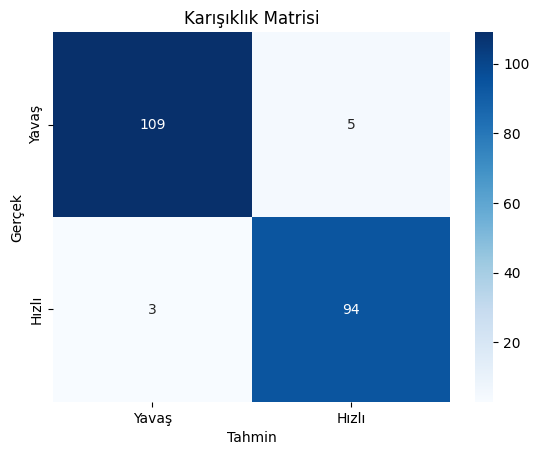

In [ ]:
# Karışıklık matrisi
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yavaş', 'Hızlı'], yticklabels=['Yavaş', 'Hızlı'])
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()

MSE,RMSE VE MAE

In [ ]:


# mse
mse = mean_squared_error(y_test, y_pred)
mse



0.037914691943127965

In [ ]:
#rmse
rmse = np.sqrt(mse)
rmse

0.1947169534044942

In [ ]:
# mae
mae = mean_absolute_error(y_test, y_pred)
mae

0.037914691943127965

In [ ]:
# komsu sayısını 1 den 10 değişimine göre sonuçları gözlemleyelim
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)

k= 1 için RMSE değeri: 0.18214103175901078
k= 2 için RMSE değeri: 0.16507932891226335
k= 3 için RMSE değeri: 0.14693641716687103
k= 4 için RMSE değeri: 0.1539372679517698
k= 5 için RMSE değeri: 0.1575884615787235
k= 6 için RMSE değeri: 0.16427990857769537
k= 7 için RMSE değeri: 0.16279310765208432
k= 8 için RMSE değeri: 0.16327512906904054
k= 9 için RMSE değeri: 0.16530070400020724
k= 10 için RMSE değeri: 0.16565252275120612


RMSE (Kök Ortalama Kare Hatası):

k=1 için RMSE değeri en yüksek (0.1821).
k değeri arttıkça RMSE düzenli olarak azalıyor ve k=8, k=9 ve k=10 için minimum değerlere ulaşıyor (yaklaşık 0.1656).
Bu, k değeri büyüdükçe modelin daha iyi genelleme yapmaya başladığını ve hatalarının azaldığını gösteriyor.

In [ ]:
# komsu sayısını 1 den 10 değişimine göre sonuçları gözlemleyelim
MAE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    print("k=", k, "için MAE değeri:", mae)


k= 1 için MAE değeri: 0.03317535545023697
k= 2 için MAE değeri: 0.035545023696682464
k= 3 için MAE değeri: 0.0363349131121643
k= 4 için MAE değeri: 0.04265402843601896
k= 5 için MAE değeri: 0.046445497630331754
k= 6 için MAE değeri: 0.051342812006319107
k= 7 için MAE değeri: 0.05145565335138795
k= 8 için MAE değeri: 0.052132701421800945
k= 9 için MAE değeri: 0.053185887309110065
k= 10 için MAE değeri: 0.05545023696682464


MAE (Ortalama Mutlak Hata):

Benzer bir şekilde, k=1 için en yüksek MAE değeri görülüyor.
k=8 ve sonrası için MAE stabil hale geliyor, yaklaşık 0.1252.

In [ ]:
# komsu sayısını 1 den 10 değişimine göre sonuçları gözlemleyelim
MSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    MSE.append(mse)
    print("k=", k, "için MAE değeri:", mse)


k= 1 için MAE değeri: 0.037914691943127965
k= 2 için MAE değeri: 0.037914691943127965
k= 3 için MAE değeri: 0.037914691943127965
k= 4 için MAE değeri: 0.037914691943127965
k= 5 için MAE değeri: 0.037914691943127965
k= 6 için MAE değeri: 0.037914691943127965
k= 7 için MAE değeri: 0.037914691943127965
k= 8 için MAE değeri: 0.037914691943127965
k= 9 için MAE değeri: 0.037914691943127965
k= 10 için MAE değeri: 0.037914691943127965


Karar Ağacı (Decision Tree)

In [ ]:
dt = DecisionTreeRegressor()


In [ ]:
dt.fit(X_train, y_train)
#BURADA KARAR AGACININ ÖĞRENME İŞLEMİ GERÇEKLEŞİR

DecisionTreeRegressor()

In [ ]:
dt.predict(X_test)[0:5]

array([1., 0., 1., 1., 0.])

In [ ]:
# modelin tahminlerinin gerçek değerlerle ne kadar iyi eşleştiğinin bir ölçüsü olan RMSE'yi hesaplar.
# Daha düşük RMSE değerleri daha iyi performansı gösterir, çünkü modelin tahminleri gerçek değerlere daha yakındır.
y_pred = dt.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.06884283908215143

In [ ]:
# bu kod bir Karar Ağacı Regresör modeli eğitir, yeni veriler üzerinde tahminler yapmak için kullanır ve ardından bu tahminlerin doğruluğunu RMSE kullanarak değerlendirir.
dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dt.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.06884283908215143

In [ ]:
dt_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [ ]:
dt = DecisionTreeRegressor()
dt_cv_model = GridSearchCV(dt, dt_params, cv = 10).fit(X_train, y_train)


In [ ]:
dt_cv_model.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [ ]:
dt_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [ ]:
y_pred = dt_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.06884283908215143

Rastgele Orman (Random Forest)

In [ ]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [ ]:
rf_model

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.06541518875178211

In [ ]:
#  Rastgele Orman modelinin önemli parametreleri için bir dizi değer sağlar.
# Bu, kodun modelin performansını optimize etmek için bu parametrelerin en iyi kombinasyonunu sistematik olarak aradığı hiperparametre ayarlaması adı verilen bir işlem için kullanılır.
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


Bu kod, Rastgele Orman modelinin hiperparametre ayarlamasını, Çapraz Doğrulama ile Izgara Araması adı verilen bir teknik kullanarak gerçekleştiriyor., verilen veriler üzerinde optimum performans elde etmek için Rastgele Orman modelinizin hiperparametrelerinin en iyi kombinasyonunu otomatik olarak arar. Bu işlem, doğru ve sağlam makine öğrenimi modelleri oluşturmak için çok önemlidir.

In [ ]:
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.06365085870497066

Değişken Önem Düzeyi

In [ ]:
rf_tuned.feature_importances_*100

array([ 7.08241355, 11.3015045 ,  0.57457782, 81.04150413])

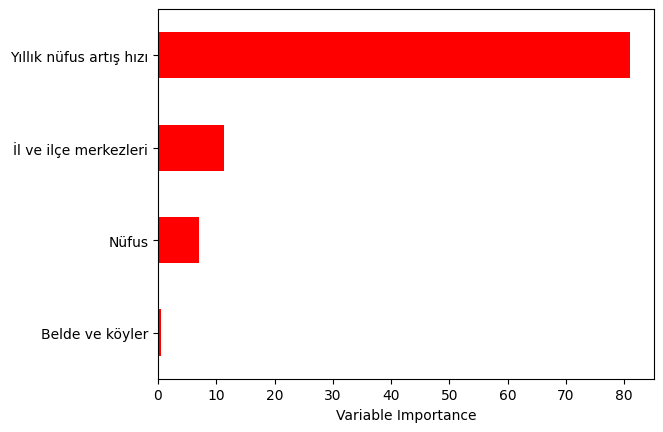

In [ ]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                          index = X.columns) # Use X.columns instead of X_train.columns


Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None